28.523226447053975
70.906631
-0.05883
相関係数は -0.6660777372789949


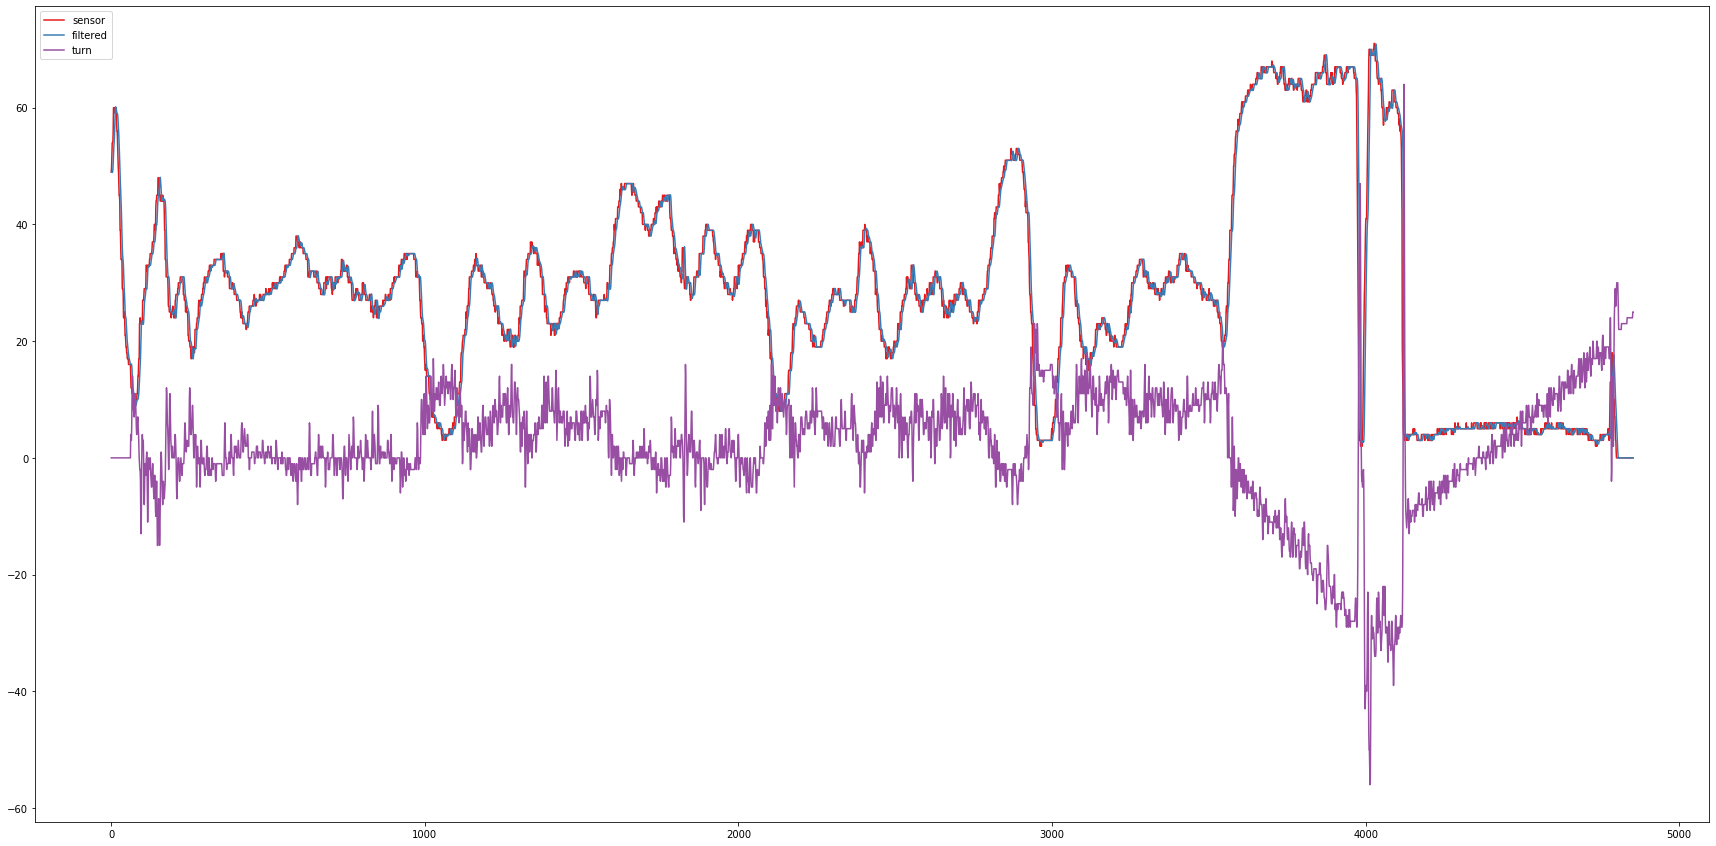

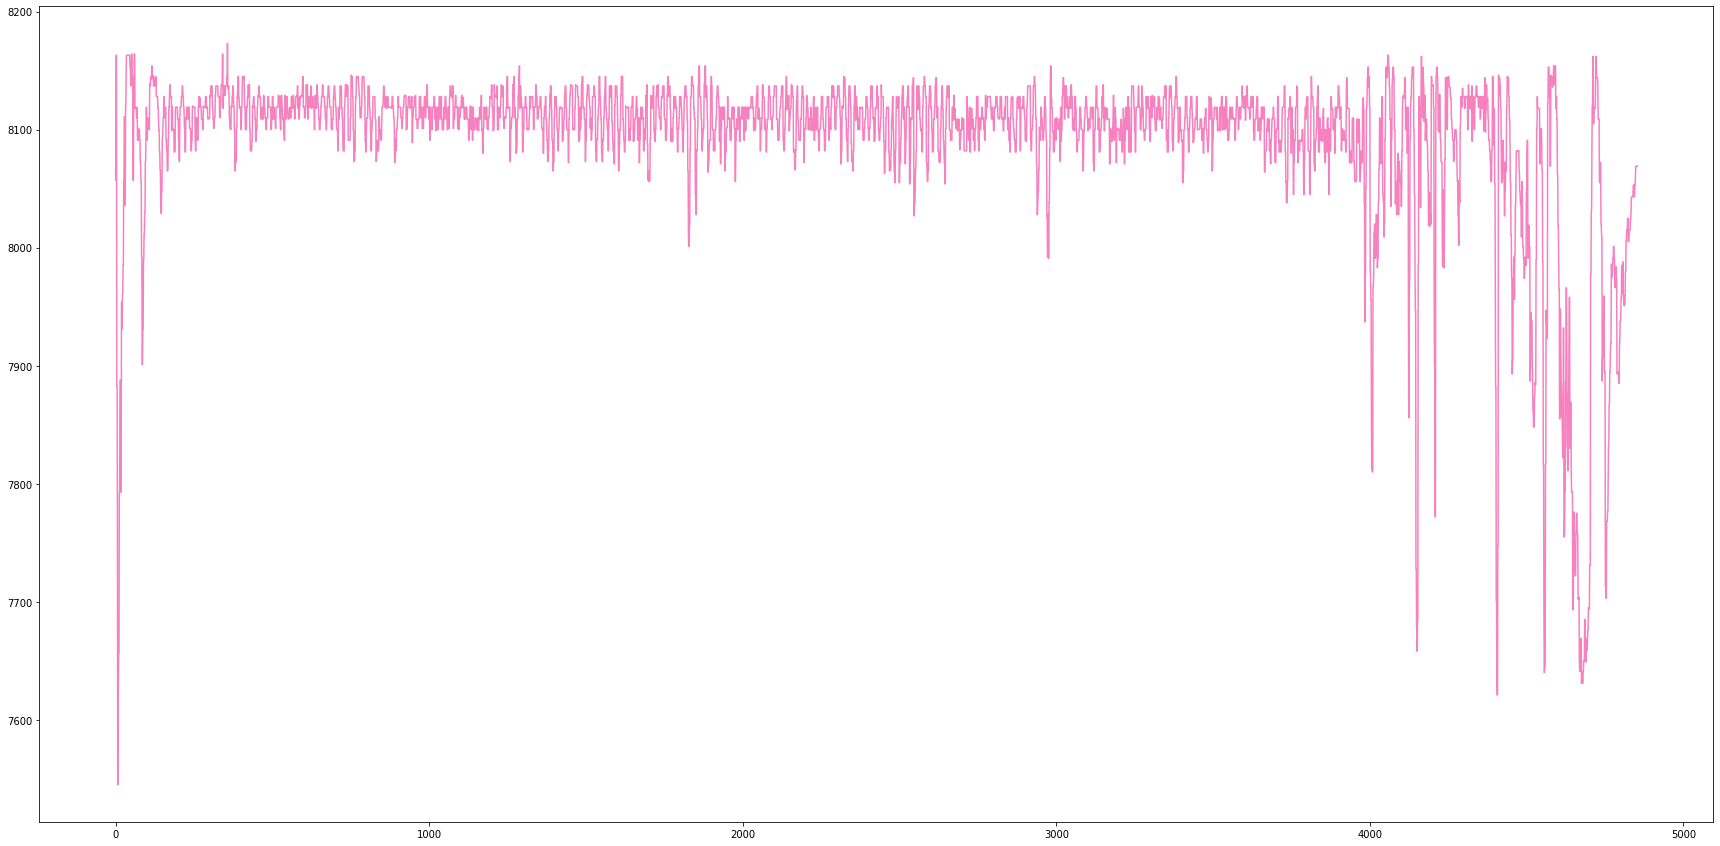

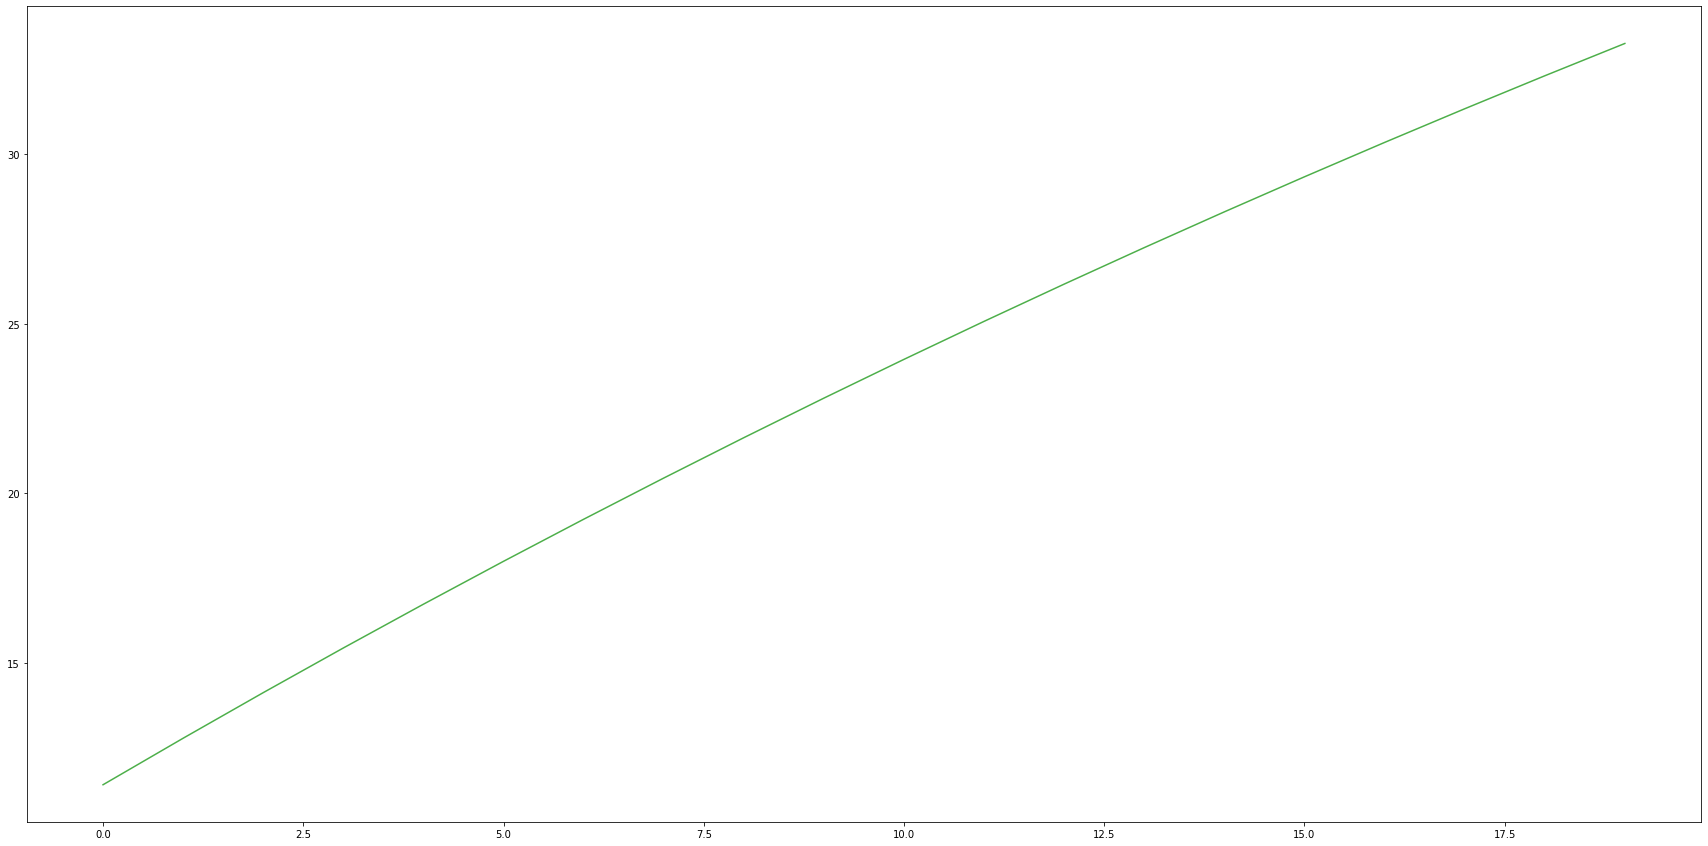

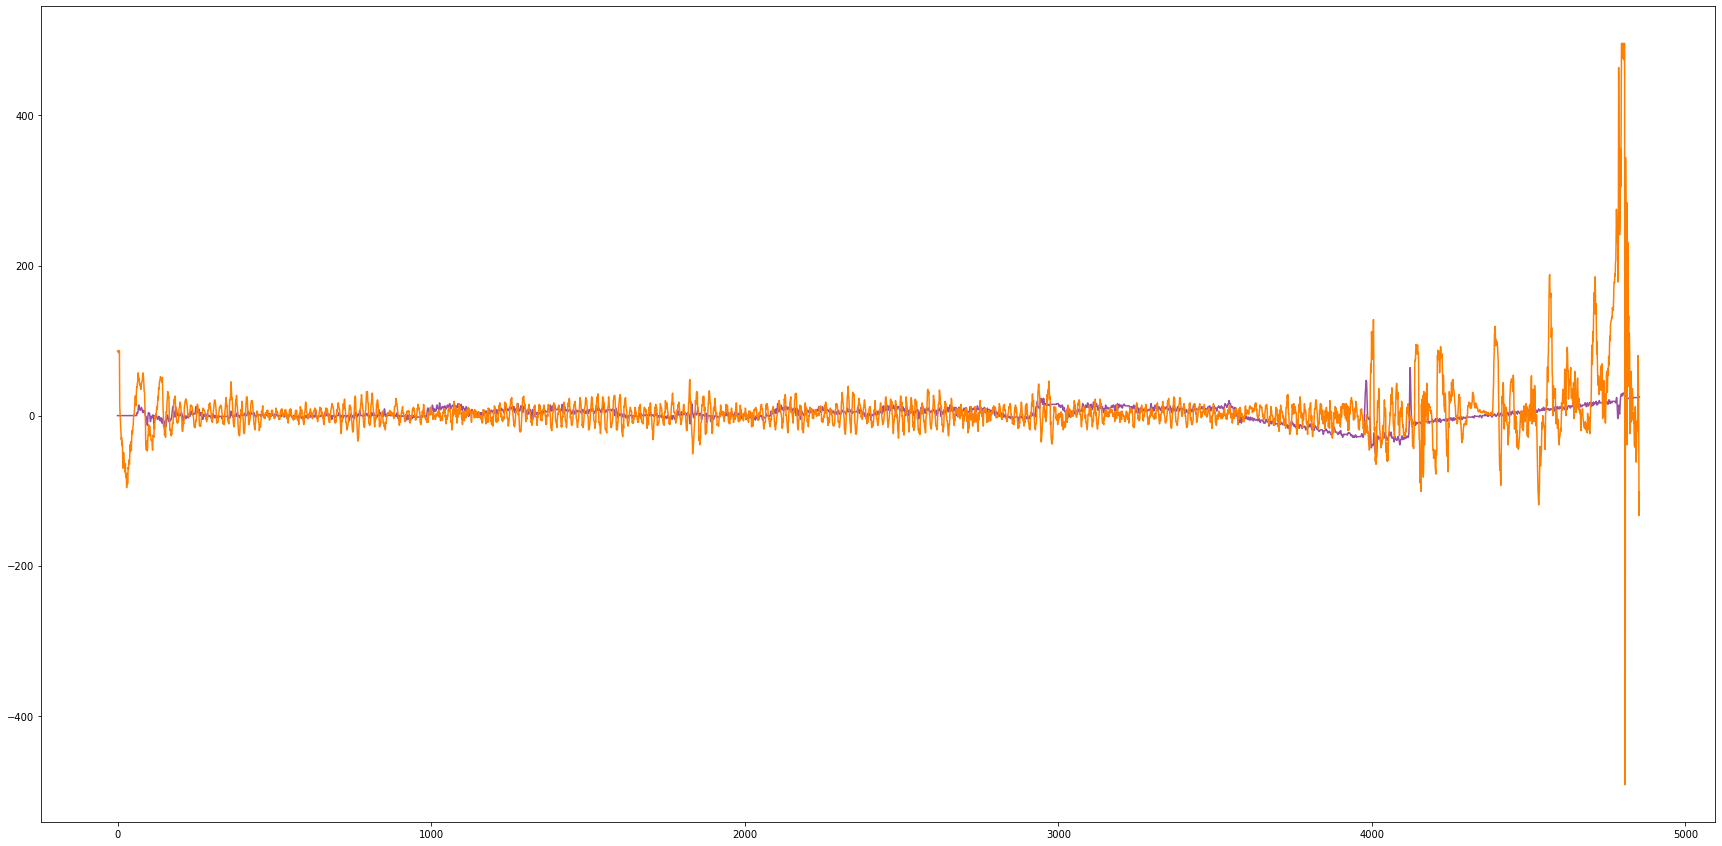

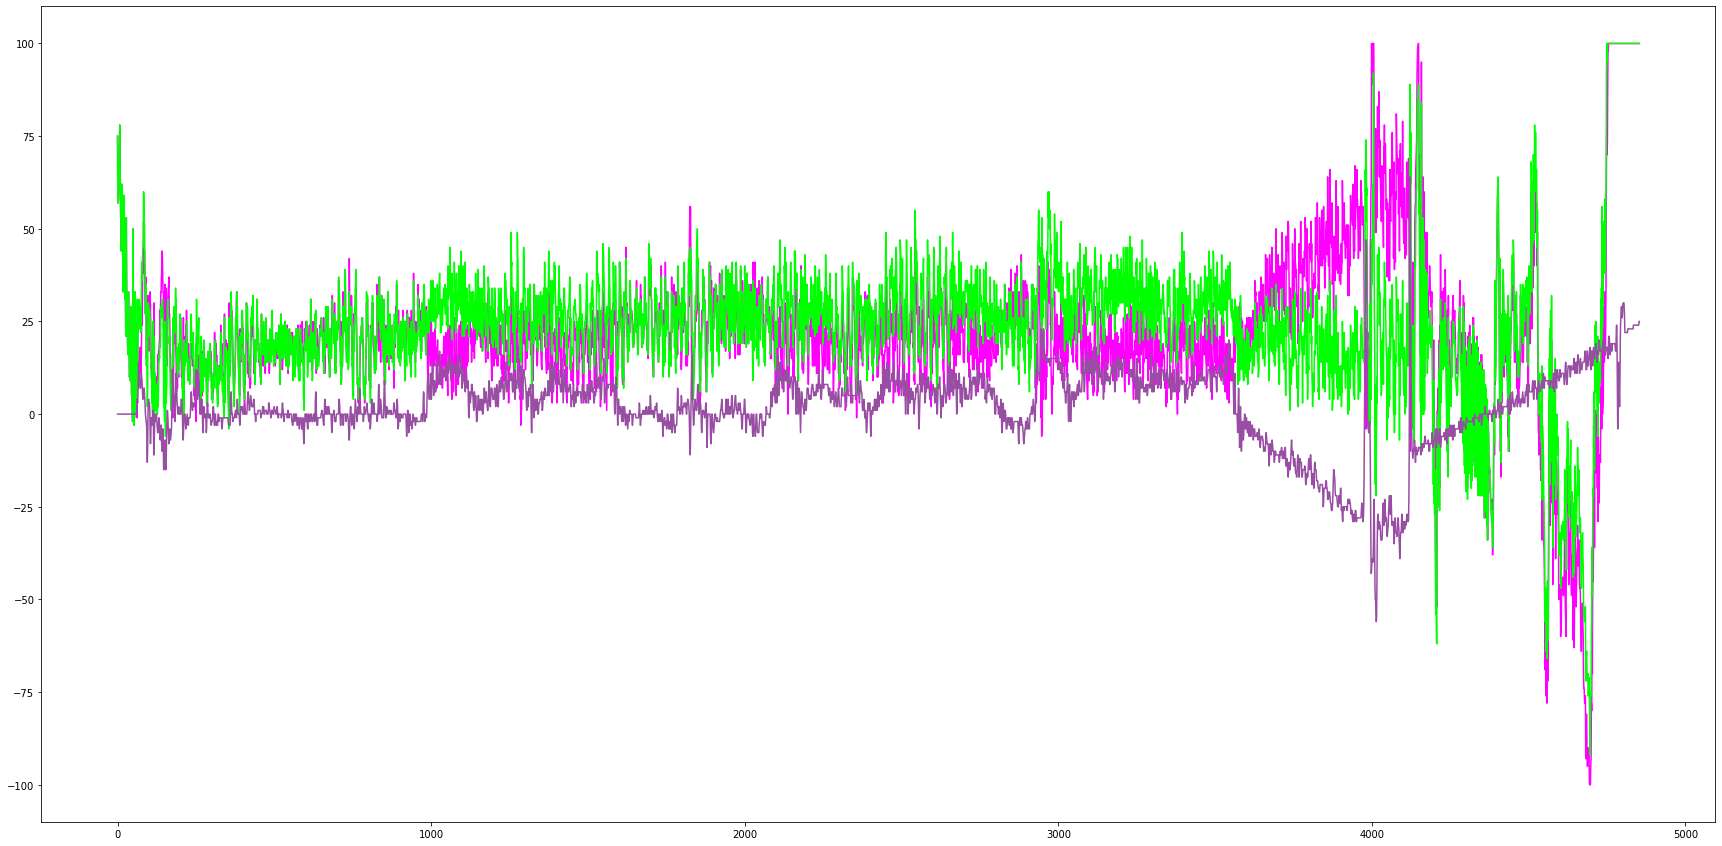

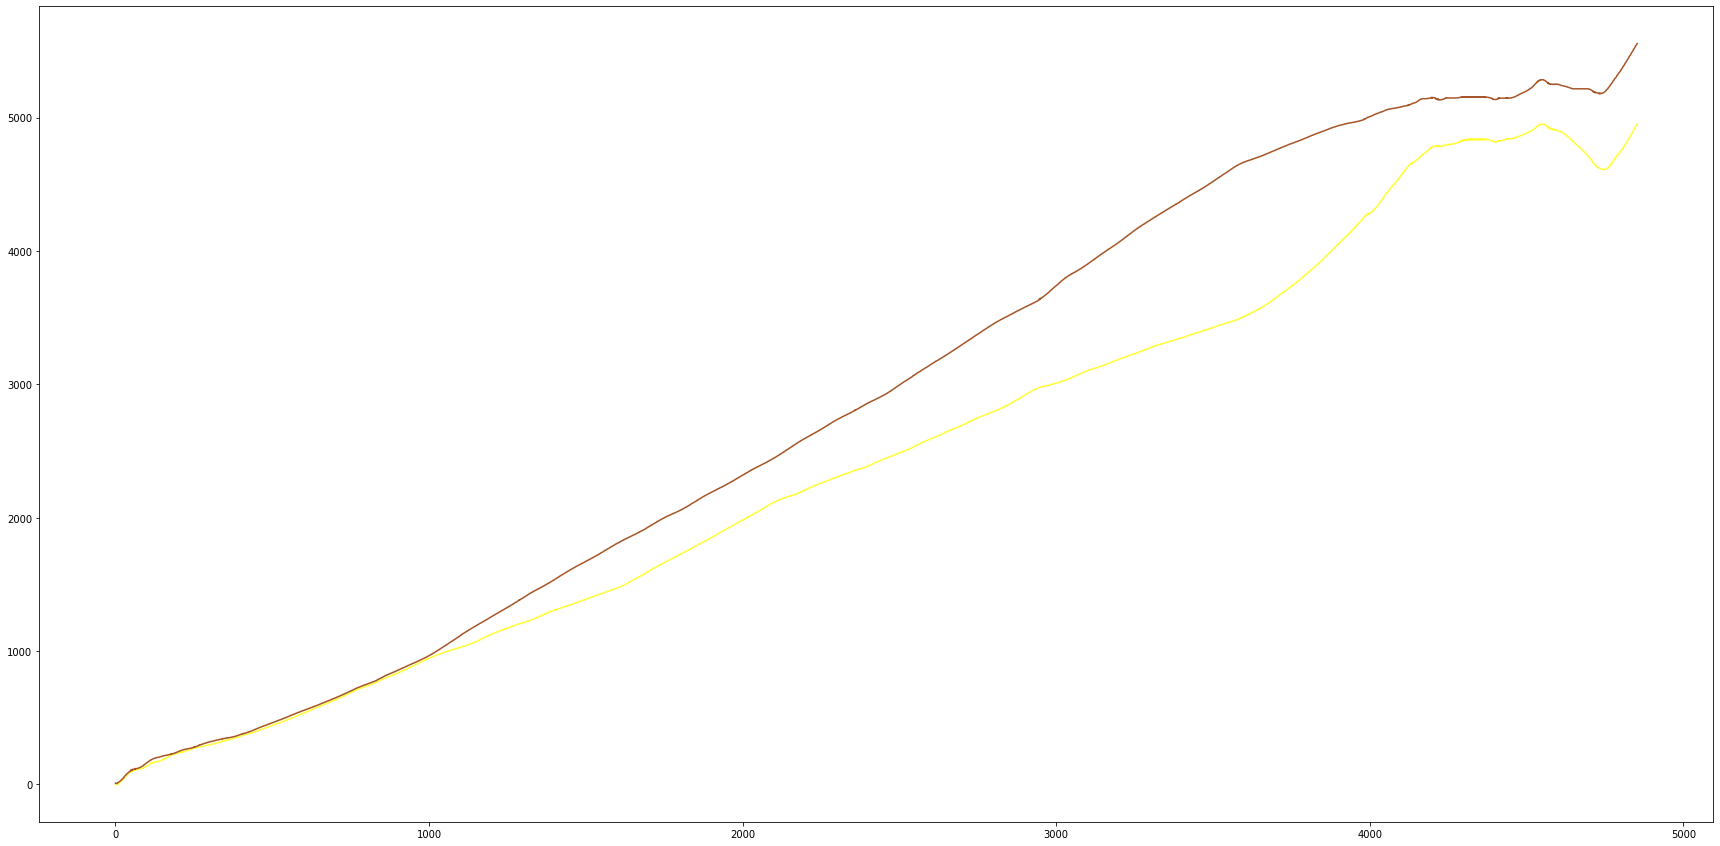

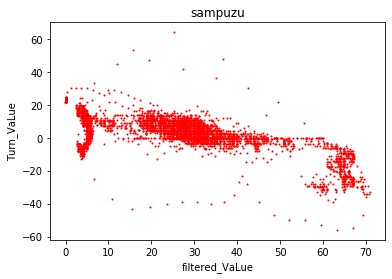

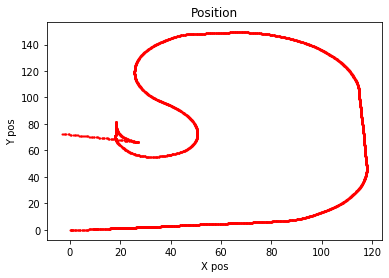

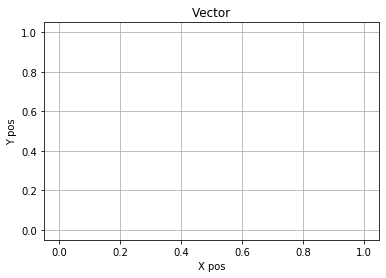

In [173]:
## SakiDocs jupyter
## tari@s1250039

## import文で外部のライブラリをインポートする。
## > import ライブラリ名 as 渾名
## いちいちmatplotlib.pyplotと打つのは面倒なのでpltと略す。
## なむぽよ～～～

import matplotlib.pyplot as plt
import numpy as np

#0 : sensor
#1 : filtered
#2 : forward
#3 : turn
#4 : gyro
#5 : left motor angle
#6 : right motor angle
#7 : voltage
#8 : left motor pwm
#9 : right motor pwm

init()
readcsv()
sel_plot()
sampuzu()
hkato()
plot_vec()
tobashi()
print('相関係数は',np.corrcoef(filtered_value,turn_value)[0, 1])

In [139]:
## sel_plot
## 関数を呼び出すだけ。

def sel_plot():
        plot_filter()
        plot_voltage()
        plot_forward()
        plot_turn_gyro()
        plot_turn()
        plot_angle()

In [140]:
## sel_stat
## 関数を呼び出すだけ。

# def sel_stat(inum):
#     if inum == '1':
#         print('左相関係数は',np.corrcoef(left_motor_pwm,left_motor_value)[0, 1])
#     elif inum == '7':
#         plot_voltage()
#     elif inum == '2':
#         plot_forward()
#     elif inum == '4':
#         plot_turn_gyro()
#     elif inum == '3':
#         plot_turn()
#     elif inum == '5':
#         plot_angle()
#     else:
#         print('ERRRR')

In [168]:
## init()
## 変数宣言など

## 宣言について
## Pythonは動的型付けなので、変数の前に型を宣言する必要はない。
## オブジェクト志向?
## 変数の宣言
## > hensuu = value
## 配列の宣言
## > hayretz1 = []
## > hayretz2 = [yoso1, yoso2]

def init():
    file = open("courseL.txt")

    global file_lines
    global filtered_value
    global filter_value
    global forward_value
    global turn_value
    global gyro_value
    global left_motor_value
    global right_motor_value
    global voltage_value
    global left_motor_pwm
    global right_motor_pwm
    global gyro_offset
    global theta
    global x_position
    global y_position
    global speed
    global x_position_t
    global y_position_t
    global theta_t
    # readlinesでfileを1行づつ読み込んで、file_linesに格納する。
    file_lines = file.readlines()
    filtered_value = []
    filter_value = []
    forward_value = []
    turn_value = []
    gyro_value = []
    left_motor_value = []
    right_motor_value = []
    voltage_value = []
    left_motor_pwm = []
    right_motor_pwm = []
    gyro_offset = []
    theta = []
    x_position = []
    y_position = []
    speed = []
    x_position_t = []
    y_position_t = []
    theta_t = []

    global colorlist
    colorlist = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf' , '#ff00ff', '#00ff00']

In [155]:
## readcsv()
## CSVファイルから値を取り出してそれぞれの変数に格納する。

## forループについて
## > for line in file_lines
## file_linesを上からlineに格納する。
## file_linesの要素数だけル-プが回ったら終了。

## replaceについて
## 第1引数を第2引数で置換する。
## 文字列は改行込みで読み込まれるので、これを虚無で置換する。

## splitについて
## 読み込まれるデ-タはcsv形式なので、ｶﾝﾏｧが来たらそこでデータを分割する。

## float(line.replace("\n", "").split(",")[0]の[0]の基準は常に行の先頭。
## 何度読み込んでも変わらない。

def readcsv():
    for line in file_lines:
            #print(len(line.replace('\n','').split(",")))
        filter_value.append(float(line.replace("\n", "").split(",")[0]))
        filtered_value.append(float(line.replace("\n", "").split(",")[1]))
        forward_value.append(float(line.replace("\n", "").split(",")[2]))
        turn_value.append(float(line.replace("\n", "").split(",")[3]))
        gyro_value.append(float(line.replace("\n", "").split(",")[4]))
        left_motor_value.append(float(line.replace("\n", "").split(",")[5]))
        right_motor_value.append(float(line.replace("\n", "").split(",")[6]))
        voltage_value.append(float(line.replace("\n", "").split(",")[7]))
        left_motor_pwm.append(float(line.replace("\n", "").split(",")[8]))
        right_motor_pwm.append(float(line.replace("\n", "").split(",")[9]))
        gyro_offset.append(float(line.replace("\n", "").split(",")[10]))
        theta.append(float(line.replace("\n", "").split(",")[11]))
        x_position.append(float(line.replace("\n", "").split(",")[12]))
        y_position.append(float(line.replace("\n", "").split(",")[13]))
        speed.append(float(line.replace("\n", "").split(",")[14]))

In [172]:
## tobashi()
## 取得した値の配列を10個飛ばしにする。(あとあとつかう)

def tobashi():
    for xxx in range(0, len(x_position),10): #ぽにゃーん
       # print (xxx) # WX
        x_position_t.append(x_position[xxx])
        y_position_t.append(y_position[xxx]) 
        theta_t.append(theta[xxx])
        

In [121]:
def plot_voltage():
    plt.figure(figsize=(30, 15))
    plt.plot(voltage_value,color=colorlist[7], label="voltage")
    plt.savefig('voltage.png')
    #特に問題はない？

In [23]:
def plot_filter():
    ## なむぽよについて
    ## np.average: 配列の平均値を返す。
    ## np.max: 配列の最大値を返す。
    ## np.min: 配列の最小値を返す。
    ## np.std: 配列の標準偏差を返す。
    ## 
    #a=input(' please input > ')
    print(np.average(filtered_value))
    print(np.max(filtered_value))
    print(np.min(filtered_value))
    plt.figure(figsize=(30, 15))
    plt.plot(filter_value,color=colorlist[0], label="sensor")
    plt.plot(filtered_value,color=colorlist[1], label="filtered")
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.legend(loc="upper left")
    plt.savefig('filter.png')
    #Turn の値がぶれる理由
    #1 : PIDのパラメーター？＝＞可能性低い？
        # => 限界感度法で合わせていく
        # -優先度低い。
    #2 : カラーの値がぶれているからTurn のぶれている => 可能性大？
        # =>　フィルタの原因ではなさそうだが、ぶれが生じている。
        # => 正規化による値の範囲を狭める。
        # => MIN, MAXの値の範囲が広いせい？
        # => 正規化が必要？
        # -優先度高くして調査必要
    #3 : バランサ(倒立振り子) -> 4msecで動かす必要がある
        # => カラーセンサも4msecでとる必要がある？
        # => PIDの計算も4msecで必要なくなる？
        # => 計算の周期を変更させる

        #- 優先度高くして調査

In [24]:
def plot_forward():
    plt.figure(figsize=(30, 15))
    plt.plot(forward_value[0:20],color=colorlist[2], label="forward")
    plt.savefig('forward.png')
    #フォワードをもう少しゆっくり上げたほうが良いか？
    #優先度高い

In [25]:
def plot_turn_gyro():
    plt.figure(figsize=(30, 15))
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.plot(gyro_value,color=colorlist[4], label="gyro")
    plt.savefig('gyro.png')
    #Gyroによる振動を変えることができる？
    #GYROに対する処理を行っていない。
    #GYROに対する処理が必要か？
        #サーチが必要！！！
        #優先度中くらい

In [26]:
def plot_turn():
    plt.figure(figsize=(30, 15))
    plt.plot(left_motor_pwm,color=colorlist[8], label="left_motor_pwm")
    plt.plot(right_motor_pwm,color=colorlist[9], label="right_motor_pwm")
    plt.plot(turn_value,color=colorlist[3], label="turn")
    plt.savefig('turn.png')
    #処理がないが必要か？
    #サーチが必要!!!
    #優先度低い?

In [77]:
## plot_angle

def plot_angle():
    plt.figure(figsize=(30, 15))
    plt.plot(left_motor_value,color=colorlist[5], label="left_motor_angle")
    plt.plot(right_motor_value,color=colorlist[6], label="right_motor_angle")
    plt.savefig('angle.png')
    #謎が存在
    #左右で一致してない！！！
    #何で！？！？！？！？
    #くるくる回っているから問題はなさそうかも！
    #右モーターと左モーターでずれがあったときに合わせることは可能か？
    #優先度低い

In [52]:
def sampuzu():
    #x = [i][j]
legend = ['sensor','filtered', 'forward', 'turn', 'gyro', 'left motor angle', 'right motor angle', 'voltage', 'left motor pwm', 'right motor pwm']
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(filtered_value,turn_value, c='red', s=1, marker='o')
    ax.set_title('sampuzu')
    ax.set_xlabel('filtered_VaLue')
    ax.set_ylabel('Turn_VaLue')
    plt.savefig('sampuzu.png')

In [81]:
## hkato
## X座標とY座標をプロットする；

def hkato():
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x_position,y_position, c='red', s=1, marker='o')
    ax.set_title('Position')
    ax.set_xlabel('X pos')
    ax.set_ylabel('Y pos')
    plt.savefig('HKato.png')

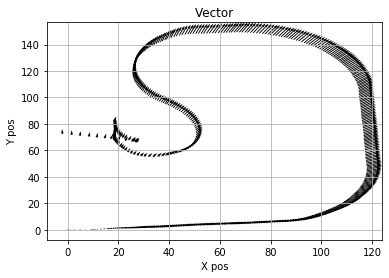

In [179]:
## plot_vec
## ある地点におけるEV3の向きをプロットする。

## scharnhorst
## tan(theta) == ???
## x = cos (theta)
## y = sin (Theta) that theta thai takeda
## (x,y),(x+cos(th),y+cos(th))
#def plot_vec():
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.quiver(x_position_t,y_position_t,(x_position_t+np.cos(theta_t))/20,(y_position_t+np.sin(theta_t))/20,angles='xy',scale_units='xy',scale=1)
plt.grid()
ax.set_title('Vector')
ax.set_xlabel('X pos')
ax.set_ylabel('Y pos')
plt.savefig('takeda.png')